# Imports

In [135]:
import pandas as pd
import numpy as np
from recommender import load_data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Loading & Inspecting Data

In [136]:
# load
df = load_data()

# get first 5
pd.set_option('display.max_columns', None)
print("df.head()=================================================")
print(df.head())

# get data structure
print("df.dtypes=================================================")
print(df.dtypes)

# get num of nulls
print("df.isnul().sum()=================================================")
print(df.isnull().sum())

# get num of uniques
print("df.nunique()=================================================")
print(df.nunique())

[INFO] CSV already exists at /Users/matthewhilliard/Documents/Projects/NewGamePlus/CS506_FinalProject/new-game-plus-backend/newgameplus/data/games.csv
df.head()=================================================
    appid                             name release_date  required_age  price  \
0     730                 Counter-Strike 2   2012-08-21             0   0.00   
1  578080              PUBG: BATTLEGROUNDS   2017-12-21             0   0.00   
2     570                           Dota 2   2013-07-09             0   0.00   
3  271590        Grand Theft Auto V Legacy   2015-04-13            17   0.00   
4  488824  Tom Clancy's Rainbow Six® Siege   2015-12-01            17  19.99   

   dlc_count                               detailed_description  \
0          1  For over two decades, Counter-Strike has offer...   
1          0  LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...   
2          2  The most-played game on Steam. Every day, mill...   
3          0  When a young street hustler

# Preprocessing

In [137]:
# remove the null name rows
df = df.drop(df.loc[df['name'].isna()].index)

# drop USELESS columns
df = df.drop(['name','tags','reviews', 'appid', 'detailed_description', 'about_the_game', 'short_description', 'header_image', 'website', 'support_url','support_email','metacritic_url','notes', 'packages', 'developers', 'publishers','screenshots', 'movies','user_score','score_rank','estimated_owners','positive','negative'], axis=1) # edw: undrop reviews and sentiment thing

In [138]:
# clean data
df['release_date_cleaned'] = pd.to_datetime(df['release_date'], errors='coerce')
df = df.drop(['release_date'], axis=1)




In [139]:
#Idetnfying the unique supported_languages


#print(type(df['supported_languages'].iloc[0]))

#def clean_language(lang):
    # Remove leading/trailing whitespace and newlines
#    lang = lang.strip()
    # Remove HTML-like tags (like [b][/b])
#    lang = re.sub(r'\[/?b\]', '', lang)
    # Strip again after removing tags
#    lang = lang.strip()
#    return lang


#df['supported_languages'] = df['supported_languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) 

#unique_supported_languages = set()

#for langs in df['supported_languages']:  # Replace with your actual column name
#    if isinstance(langs, list):
#        for lang in langs:
            # Some entries may still have multiple langs joined with commas
#            for l in lang.split(','):
#                cleaned = clean_language(l)
#                unique_supported_languages.add(cleaned)

#unique_supported_languages = list(unique_supported_languages)
#print("Unique supported languages", unique_supported_languages)


In [140]:
#One hot encoding the languages

#lang_columns = {}

#for lang in unique_supported_languages:
#    lang_columns[lang+"_supported_languages"] = df['supported_languages'].apply(lambda x: 1 if lang in x else 0)

#lang_df = pd.DataFrame(lang_columns)

#df = pd.concat([df, lang_df], axis=1)

df.drop("supported_languages", axis = 1, inplace = True)

#print(df.head())

In [141]:
#identify the unique supported audios
#df['full_audio_languages'] = df['full_audio_languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) 

#unique_full_audio_languages = set()

#for langs in df['full_audio_languages']:  # Replace with your actual column name
#    if isinstance(langs, list):
#        for lang in langs:
            # Some entries may still have multiple langs joined with commas
#            for l in lang.split(','):
#                cleaned = clean_language(l)
#                unique_full_audio_languages.add(cleaned)

#unique_full_audio_languages = list(unique_full_audio_languages)
#print("Unique Full Audio Languages:", unique_full_audio_languages)

In [142]:
#one hot encoding full audio languages

#audio_lang_columns = {}

#for audio_lang in unique_full_audio_languages:
#    audio_lang_columns[audio_lang+"_full_audio_languages"] = df['full_audio_languages'].apply(lambda x: 1 if lang in x else 0)

#audio_lang_df = pd.DataFrame(audio_lang_columns)

#df = pd.concat([df, audio_lang_df], axis=1)

df.drop("full_audio_languages", axis=1, inplace=True)


#print(df.head())

In [143]:
#Identifying the unique genres
import ast
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

unique_genres = set()

for genres in df['genres']:
    if isinstance(genres, list):
        unique_genres.update(genres)

unique_genre_list = list(unique_genres)
#print("Unique genres:", unique_genre_list)

In [144]:
#One hot encoding the genres
for genre in unique_genres:
    df[genre] = df['genres'].apply(lambda x: 1 if genre in x else 0)

df.drop("genres", axis=1, inplace=True)


#print(df.head())

In [145]:
#identifying unique categories

import ast
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

unique_categories = set()

for categories in df['categories']:
    if isinstance(categories, list):
        unique_categories.update(categories)

unique_categories_list = list(unique_categories)
#print("Unique categories:", unique_categories_list)

In [146]:
#One hot encoding the genres

for categories in unique_categories:
    df[categories] = df['categories'].apply(lambda x: 1 if categories in x else 0)

df.drop("categories", axis=1, inplace=True)

#print(df.head())

In [147]:
# convert boolean into numerical
df['windows'] = df['windows'].astype(int)
df['mac'] = df['mac'].astype(int)
df['linux'] = df['linux'].astype(int)


In [148]:
# drop datetime
df = df.drop('release_date_cleaned', axis=1)

In [149]:
pd.set_option('display.max_columns', None)
X = df
X

,required_age,price,dlc_count,windows,mac,linux,metacritic_score,achievements,recommendations,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,Free To Play,Gore,Game Development,Massively Multiplayer,Documentary,Design & Illustration,Early Access,Indie,Action,Animation & Modeling,360 Video,Episodic,Violent,Sports,Adventure,Simulation,Web Publishing,Video Production,Sexual Content,Audio Production,Photo Editing,Tutorial,Accounting,Strategy,Casual,Movie,RPG,Nudity,Racing,Education,Software Training,Utilities,Short,Remote Play Together,Single-player,Shared/Split Screen Co-op,In-App Purchases,LAN Co-op,VR Supported,Includes level editor,Remote Play on TV,Shared/Split Screen,Tracked Controller Support,Steam Trading Cards,Includes Source SDK,Shared/Split Screen PvP,LAN PvP,Online Co-op,MMO,Partial Controller Support,PvP,Remote Play on Phone,SteamVR Collectibles,Online PvP,Commentary available,VR Support,Co-op,Family Sharing,Steam Workshop,Steam Achievements,Full controller support,VR Only,Steam Turn Notifications,Valve Anti-Cheat enabled,HDR available,Multi-player,Remote Play on Tablet,Steam Timeline,Stats,Steam Cloud,Captions available,Cross-Platform Multiplayer,Steam Leaderboards
0,0,0.00,1,1,0,1,0,1,4401572,33189,879,5174,350,0,1212356,86,8632939,82,96473,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0,1,0
1,0,0.00,0,1,0,0,0,37,1732007,0,0,0,0,0,616738,59,2513842,68,16720,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
2,0,0.00,2,1,1,1,90,0,14337,43031,1536,898,892,0,555977,81,2452595,80,29366,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
3,17,0.00,0,1,0,0,96,77,1803063,19323,771,7101,74,0,117698,87,1803832,92,17517,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0
4,17,19.99,9,1,0,0,0,0,1160724,0,0,0,0,0,0,84,1168404,76,13017,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94943,0,3.99,0,1,0,0,0,6,0,0,0,0,0,0,0,-1,-1,-1,-1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
94944,0,10.00,0,1,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94945,0,1.99,0,1,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94946,0,29.99,0,1,0,0,0,34,0,0,0,0,0,0,0,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,1


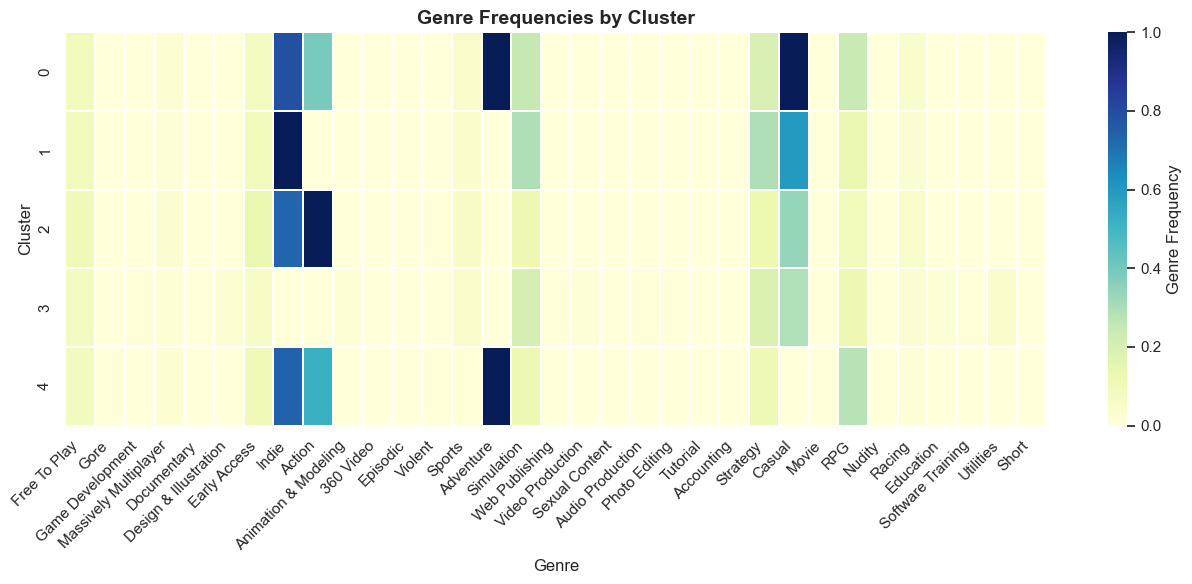

Number of games per genre cluster:
genre_cluster
0    13902
1    21505
2    20294
3    17684
4    21561
Name: count, dtype: int64


In [150]:
# Scale the data
scaler = StandardScaler()
X = df[unique_genre_list].copy()

# Use KMeans to cluster the genres, run many times to get the best result
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=250)
cluster_labels = kmeans.fit_predict(X)

# Assign cluster labels to dataframe
df['genre_cluster'] = cluster_labels

# Elbow method to find the optimal number of clusters
# inertia_vals = []
# k_values = range(2, 12)

# for k in k_values:
#     km = KMeans(n_clusters=k, init='k-means++')
#     km.fit(X)
#     inertia_vals.append(km.inertia_)

# plt.figure()
# plt.plot(k_values, inertia_vals, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Genre Clustering')
# plt.tight_layout()
# plt.show()

# Heatmap of genre frequencies by cluster
df_genres = df[unique_genre_list + ['genre_cluster']]
cluster_genre_means = df_genres.groupby('genre_cluster')[unique_genre_list].mean()

plt.figure(figsize=(len(unique_genre_list) * 0.4, 6))
sns.heatmap(cluster_genre_means,
            cmap='YlGnBu',
            linewidths=0.3,
            cbar_kws={'label': 'Genre Frequency'})

plt.title("Genre Frequencies by Cluster", fontsize=14, weight='bold')
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Cluster", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the number of games in each cluster
cluster_counts = df['genre_cluster'].value_counts().sort_index()
print("Number of games per genre cluster:")
print(cluster_counts)


/var/folders/rg/ktck18k10tn_9fm_2btps4g40000gn/T/ipykernel_47333/543047480.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_cluster', y='price', data=df, palette='Set2')


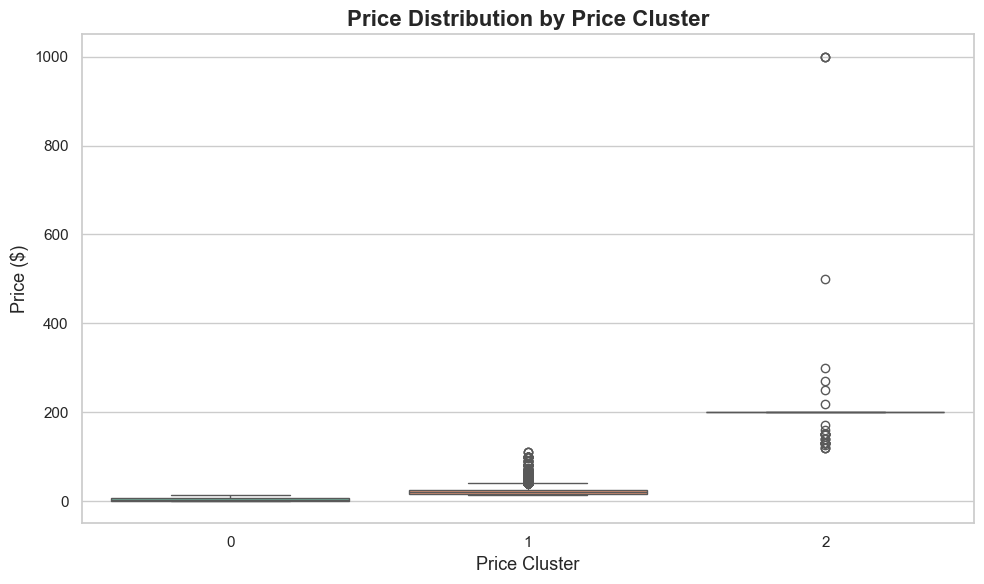

Number of games per price cluster:
price_cluster
0    80132
1    14633
2      181
Name: count, dtype: int64


In [151]:
# Create a copy of the dataframe for price clustering
X_price = df[['price']].copy()

# Scale the data
scaler = StandardScaler()
X_price_scaled = scaler.fit_transform(X_price)

# Use KMeans to cluster the price, run many times to get the best result
kmeans_price = KMeans(n_clusters=3, init='k-means++', n_init=250)
price_cluster_labels = kmeans_price.fit_predict(X_price_scaled)

# Assign cluster labels to dataframe
df['price_cluster'] = price_cluster_labels

# Elbow method to find the optimal number of clusters
# inertia_vals_price = []
# k_values = range(2, 12)

# for k in k_values:
#     km = KMeans(n_clusters=k, init='k-means++')
#     km.fit(X_price_scaled)
#     inertia_vals_price.append(km.inertia_)

# plt.figure()
# plt.plot(k_values, inertia_vals_price, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Price Clustering')
# plt.tight_layout()
# plt.show()

# Boxplot of price distribution by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_cluster', y='price', data=df, palette='Set2')
plt.title("Price Distribution by Price Cluster", fontsize=16, weight='bold')
plt.xlabel("Price Cluster", fontsize=13)
plt.ylabel("Price ($)", fontsize=13)
plt.tight_layout()
plt.show()

# Print the number of games in each price cluster
price_cluster_counts = df['price_cluster'].value_counts().sort_index()
print("Number of games per price cluster:")
print(price_cluster_counts)


/var/folders/rg/ktck18k10tn_9fm_2btps4g40000gn/T/ipykernel_47333/3602886038.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ccu_cluster', y='peak_ccu', data=df, palette='Set2')


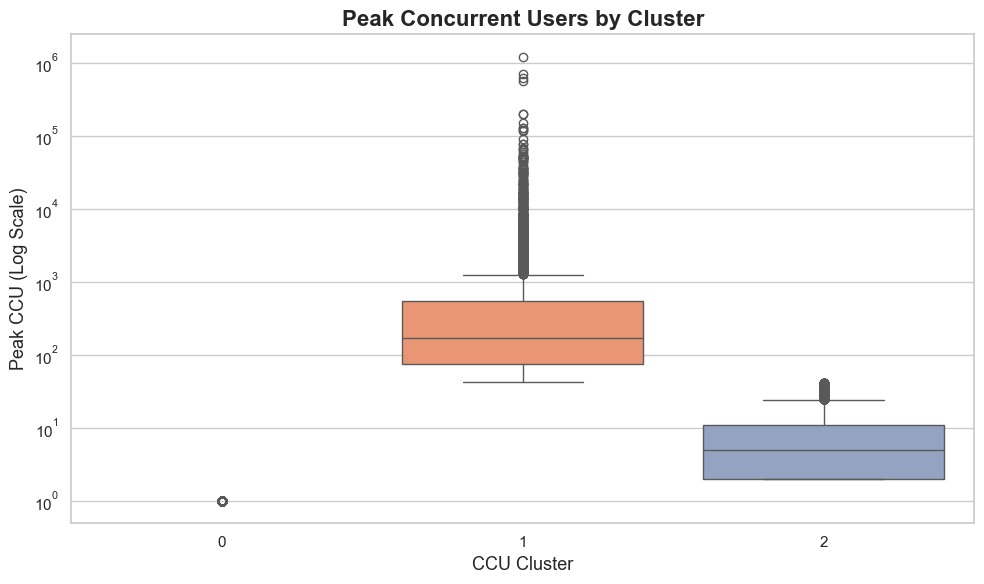

Number of games per CCU cluster:
ccu_cluster
0    82308
1     3121
2     9517
Name: count, dtype: int64


In [152]:
# Create a copy of the dataframe for CCU clustering
df['peak_ccu_log'] = np.log1p(df['peak_ccu'])  # log1p handles 0 values safely
X_ccu_log = df[['peak_ccu_log']].copy()

# Scale the data
scaler = StandardScaler()
X_ccu_log_scaled = scaler.fit_transform(X_ccu_log)

# Use KMeans to cluster the log peak CCU, run many times to get the best result
kmeans_ccu = KMeans(n_clusters=3, init='k-means++', n_init=250)
ccu_cluster_labels = kmeans_ccu.fit_predict(X_ccu_log_scaled)

# Assign cluster labels to dataframe
df['ccu_cluster'] = ccu_cluster_labels

# Elbow method to find the optimal number of clusters
# inertia_vals_ccu = []
# k_values = range(2, 12)

# for k in k_values:
#     km = KMeans(n_clusters=k, init='k-means++')
#     km.fit(X_ccu_log_scaled)
#     inertia_vals_ccu.append(km.inertia_)

# plt.figure()
# plt.plot(k_values, inertia_vals_ccu, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Log Peak CCU Clustering')
# plt.tight_layout()
# plt.show()

# Boxplot of peak CCU distribution by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='ccu_cluster', y='peak_ccu', data=df, palette='Set2')
plt.yscale('log')  # Important: CCU still spans large values
plt.title("Peak Concurrent Users by Cluster", fontsize=16, weight='bold')
plt.xlabel("CCU Cluster", fontsize=13)
plt.ylabel("Peak CCU (Log Scale)", fontsize=13)
plt.tight_layout()
plt.show()

# Print the number of games in each CCU cluster
ccu_cluster_counts = df['ccu_cluster'].value_counts().sort_index()
print("Number of games per CCU cluster:")
print(ccu_cluster_counts)
